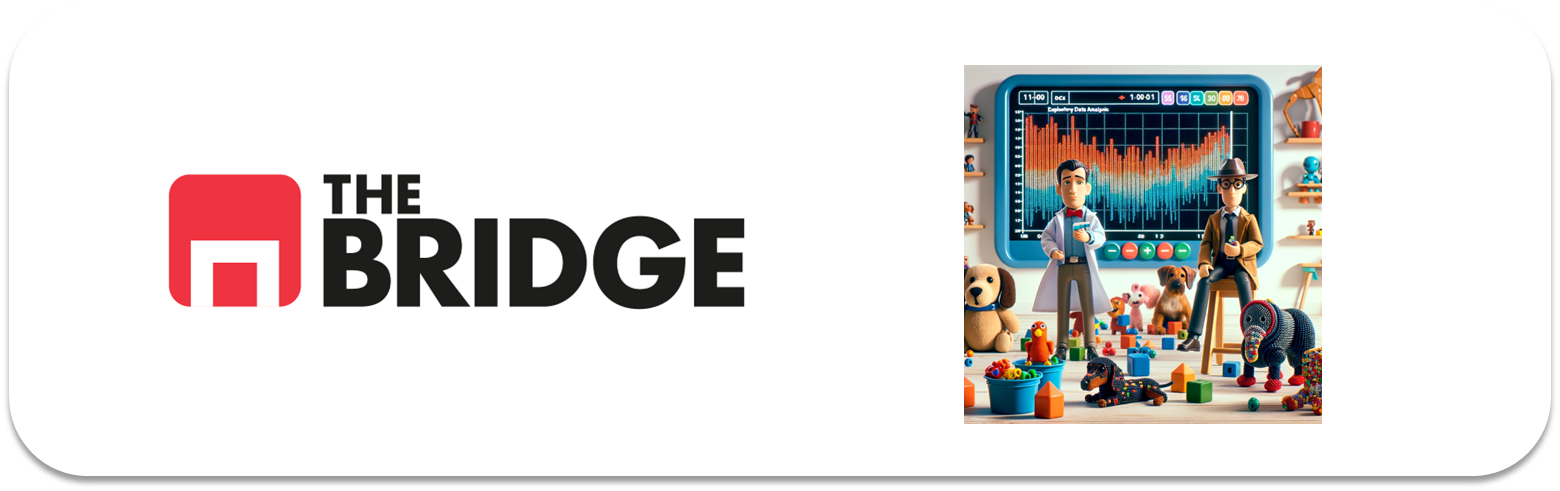

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

from bootcampviztools import *


In [2]:
def cardinalidad (df_in, umbral_cardi, umbral_porce):
    df_tipificacion = pd.DataFrame([df_in.nunique(), df_in.nunique()/len(df_in) * 100, df_in.dtypes]).T.rename(columns = {0: "Cardinalidad", 1: "%_Cardinalidad", 2: "Tipo"})
    df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
    df_tipificacion.loc[df_tipificacion.Cardinalidad == 2, "Clasificada_como"] = "Binaria"
    df_tipificacion.loc[df_tipificacion["Cardinalidad"] > umbral_cardi, "Clasificada_como"] ="Numerica Discreta"
    df_tipificacion.loc[df_tipificacion["%_Cardinalidad"] > umbral_porce, "Clasificada_como"] = "Numerica Continua"
    return df_tipificacion

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic_copia = df_titanic.copy()
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic = df_titanic.drop(["deck","survived", "pclass", "embarked"], axis=1)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic = df_titanic.drop(["parch","sibsp"], axis=1)
df_titanic.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
print("Antes de imputar la moda:")
print()
print(df_titanic['embark_town'].unique())

Antes de imputar la moda:

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [7]:
print("Despues de imputar la moda:")
print()
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0])
print(df_titanic['embark_town'].unique())

Despues de imputar la moda:

['Southampton' 'Cherbourg' 'Queenstown']


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:

#df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean()) esto es sin tener en cuenta who
df_titanic['age'] = df_titanic.groupby('who')['age'].transform(lambda x: x.fillna(round(x.mean(), 1)))
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [9]:
#Para las graficas traduciré las columnas al español.

df_titanic_copia = df_titanic_copia.drop(["deck","survived", "pclass", "embarked"], axis=1)
df_titanic_copia['family_members'] = df_titanic_copia['parch'] + df_titanic_copia['sibsp']
df_titanic_copia = df_titanic_copia.drop(["parch","sibsp"], axis=1)
df_titanic_copia['embark_town'] = df_titanic_copia['embark_town'].fillna(df_titanic_copia['embark_town'].mode()[0])
df_titanic_copia['age'] = df_titanic_copia.groupby('who')['age'].transform(lambda x: x.fillna(round(x.mean(), 1)))


df_titanic_copia = df_titanic_copia.rename(columns={'alive': 'Supervivencia'})
df_titanic_copia = df_titanic_copia.rename(columns={'who': 'Grupo demografico'})
df_titanic_copia = df_titanic_copia.rename(columns={'class': 'Clase'})
df_titanic_copia = df_titanic_copia.rename(columns={'embark_town': 'Ciudad de embarque'})
df_titanic_copia = df_titanic_copia.rename(columns={'fare': 'Precio del pasaje'})
df_titanic_copia = df_titanic_copia.rename(columns={'age': 'Edad'})

df_titanic_copia["Supervivencia"] = df_titanic_copia["Supervivencia"].replace({"no": "Fallecio", "yes": "Sobrevivió"})
df_titanic_copia["Grupo demografico"] = df_titanic_copia["Grupo demografico"].replace({"woman": "Mujeres", "man": "Hombres", "child": "Niños"})
df_titanic_copia["Clase"] = df_titanic_copia["Clase"].replace({"First": "Primera", "Second": "Segunda", "Third": "Tercera"})

In [10]:
cardinalidad_titanic = cardinalidad(df_titanic,10,30)
cardinalidad_titanic

,Cardinalidad,%_Cardinalidad,Tipo,Clasificada_como
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica Discreta
fare,248,27.833895,float64,Numerica Discreta
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria
embark_town,3,0.3367,object,Categorica
alive,2,0.224467,object,Binaria
alone,2,0.224467,bool,Binaria
family_members,9,1.010101,int64,Categorica


### 1.6 Paso previo

In [11]:
pasajeros_totales_supervivientes = df_titanic.loc[df_titanic['alive'] == 'yes'].shape[0]
pasajeros_totales_no_supervivientes = df_titanic.loc[df_titanic['alive'] == 'no'].shape[0]
total_de_pasajeros = pasajeros_totales_supervivientes + pasajeros_totales_no_supervivientes
pa_so_por = round((pasajeros_totales_supervivientes/total_de_pasajeros)*100,3)
pa_no_so_por = round((pasajeros_totales_no_supervivientes/total_de_pasajeros)*100,3)
print(f'De los {total_de_pasajeros}  de pasajeros totales {pasajeros_totales_supervivientes} sobrevivieron y {pasajeros_totales_no_supervivientes} fallecieron')
print(f'Esto supone un {pa_so_por}% de pasajeros que sobrevivieron y un {pa_no_so_por}% de mortandad.')

De los 891  de pasajeros totales 342 sobrevivieron y 549 fallecieron
Esto supone un 38.384% de pasajeros que sobrevivieron y un 61.616% de mortandad.


### 1.6.1

In [12]:
pasajeros_totales_hombres = df_titanic.loc[df_titanic['who'] == 'man'].shape[0]
pasajeros_totales_mujeres = df_titanic.loc[df_titanic['who'] == 'woman'].shape[0]
pasajeros_totales_niños = df_titanic.loc[df_titanic['who'] == 'child'].shape[0]
pasajeros_totales = pasajeros_totales_hombres+ pasajeros_totales_mujeres+ pasajeros_totales_niños
por_hombres= round((pasajeros_totales_hombres/pasajeros_totales)*100,2)
por_mujeres= round((pasajeros_totales_mujeres/pasajeros_totales)*100,2)
por_niños= round((pasajeros_totales_niños/pasajeros_totales)*100,2)
print(f'Los pasajeros totales según grupo fueron: \n{pasajeros_totales_hombres} Hombres lo que supone un {por_hombres}% respecto al total de pasajeros') 
print(f'{pasajeros_totales_mujeres} Mujeres lo que supone un {por_mujeres}% respecto al total de pasajeros') 
print(f'y {pasajeros_totales_niños} niños lo que supone un {por_niños}% respecto al total de pasajeros\nen total fueron {pasajeros_totales} pasajeros.')
print()
sobrevivientes_hombres = df_titanic.loc[(df_titanic['who'] == 'man') & (df_titanic['alive'] == 'yes')].shape[0]
sobrevivientes_mujeres = df_titanic.loc[(df_titanic['who'] == 'woman') & (df_titanic['alive'] == 'yes')].shape[0]
sobrevivientes_niños = df_titanic.loc[(df_titanic['who'] == 'child') & (df_titanic['alive'] == 'yes')].shape[0]
print(f'En terminos absolutos los supervivientes por grupos fueron:\n{sobrevivientes_hombres} hombres supervivientes.\n{sobrevivientes_mujeres} mujeres sobrevivieron \nY {sobrevivientes_niños} supervivientes niños')
sobrevivientes_relativos_hombres = round((sobrevivientes_hombres/pasajeros_totales_hombres)*100,3)
sobrevivientes_relativos_mujeres = round((sobrevivientes_mujeres/pasajeros_totales_mujeres)*100,3)
sobrevivientes_relativos_niños = round((sobrevivientes_niños/pasajeros_totales_niños)*100,3)
print()
print(f'En terminos relativos los supervivientes por grupo fueron:\n{sobrevivientes_relativos_hombres}% de hombres supervivientes respecto al total de hombres\n{sobrevivientes_relativos_mujeres}% de mujeres supervivientes respecto al total de mujeres\ny {sobrevivientes_relativos_niños}% de niños supervivientes respecto al total de niños')
print()
print("Si comparamos los supervientes, por grupos, segun el total de pasajeros sería así:")
hombres_del_total= round((sobrevivientes_hombres/pasajeros_totales)*100,3)
mujeres_del_total= round((sobrevivientes_mujeres/pasajeros_totales)*100,3)
niños_del_total= round((sobrevivientes_niños/pasajeros_totales)*100,3)
print(f'En terminos relativos los supervivientes por grupo fueron:\n{hombres_del_total}% de hombres supervivientes respecto al total de pasajeros\n{mujeres_del_total}% de mujeres supervivientes respecto al total de pasajeros\ny {niños_del_total}% de niños supervivientes respecto al total de pasajeros')
print()
print("Si comparamos porcentaje de cada grupo que sobrevivió, con el porcentaje (respecto al total de pasajeros) vemos que:")
print(f'De un {por_hombres}% de pasajeros hombres sobrevivieron el {hombres_del_total}%')
print(f'De un {por_mujeres}% de pasajeras mujeres sobrevivieron el {mujeres_del_total}%')
print(f'De un {por_niños}% de pasajeros niños sobrevivieron el {niños_del_total}%')
print()
print("La tabla de contingencia es:")
tabla_contingencia_sexo = pd.crosstab(df_titanic['who'], df_titanic['alive'])
tabla_contingencia_sexo


Los pasajeros totales según grupo fueron: 
537 Hombres lo que supone un 60.27% respecto al total de pasajeros
271 Mujeres lo que supone un 30.42% respecto al total de pasajeros
y 83 niños lo que supone un 9.32% respecto al total de pasajeros
en total fueron 891 pasajeros.

En terminos absolutos los supervivientes por grupos fueron:
88 hombres supervivientes.
205 mujeres sobrevivieron 
Y 49 supervivientes niños

En terminos relativos los supervivientes por grupo fueron:
16.387% de hombres supervivientes respecto al total de hombres
75.646% de mujeres supervivientes respecto al total de mujeres
y 59.036% de niños supervivientes respecto al total de niños

Si comparamos los supervientes, por grupos, segun el total de pasajeros sería así:
En terminos relativos los supervivientes por grupo fueron:
9.877% de hombres supervivientes respecto al total de pasajeros
23.008% de mujeres supervivientes respecto al total de pasajeros
y 5.499% de niños supervivientes respecto al total de pasajeros

Si

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [13]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_sexo)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


Dado que el valor p es extremadamente pequeño (2.2227620817798914e-62, que es esencialmente cero en términos prácticos), proporciona una fuerte evidencia en contra de la hipótesis nula de que no hay asociación entre las variables categóricas. Por lo tanto, podemos concluir que las variables están significativamente relacionadas entre sí. En resumen, sí, están muy relacionadas.

### 1.6.1 GRAFICAMENTE

Distribucion de los valores relativos:


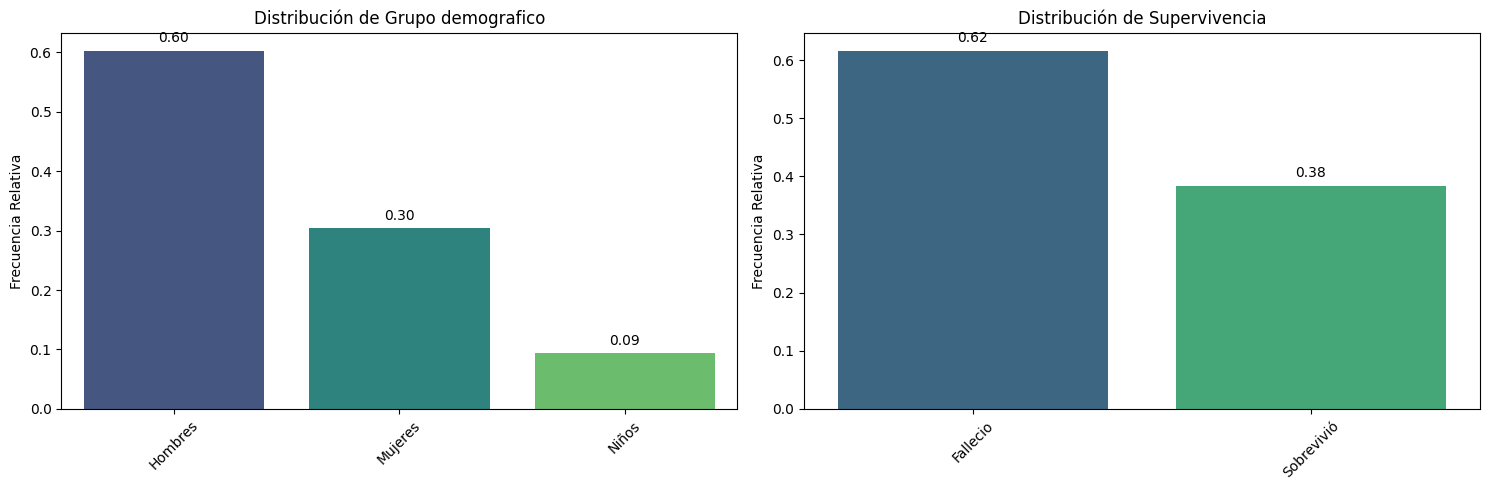

In [14]:
print("Distribucion de los valores relativos:")
pinta_distribucion_categoricas(df_titanic_copia,["Grupo demografico","Supervivencia"], relativa= True, mostrar_valores= True)

Valores relativos de la relacion grupo (Hombre, mujer, niño)/supervivencia:


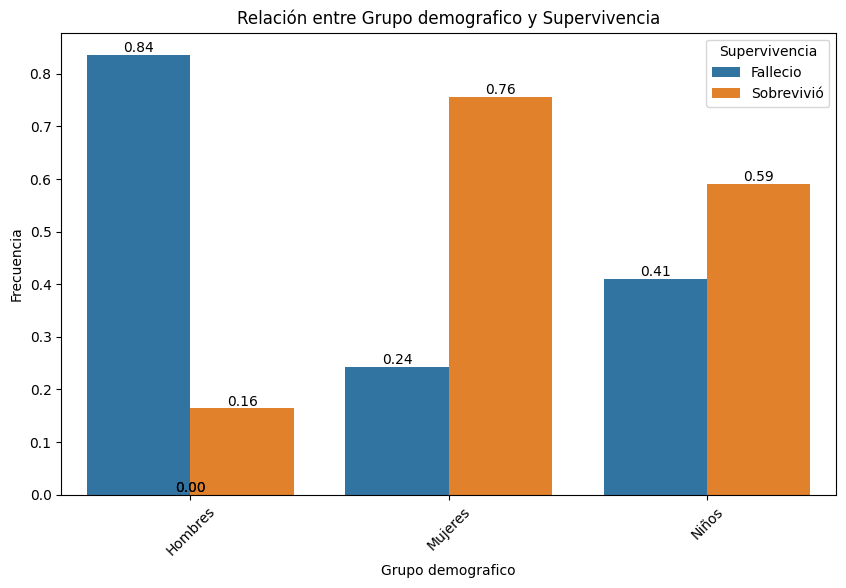

In [15]:
print("Valores relativos de la relacion grupo (Hombre, mujer, niño)/supervivencia:")
plot_categorical_relationship_fin(df_titanic_copia, "Grupo demografico","Supervivencia", relative_freq = True, show_values = True)




Distribucion de los valores absolutos:


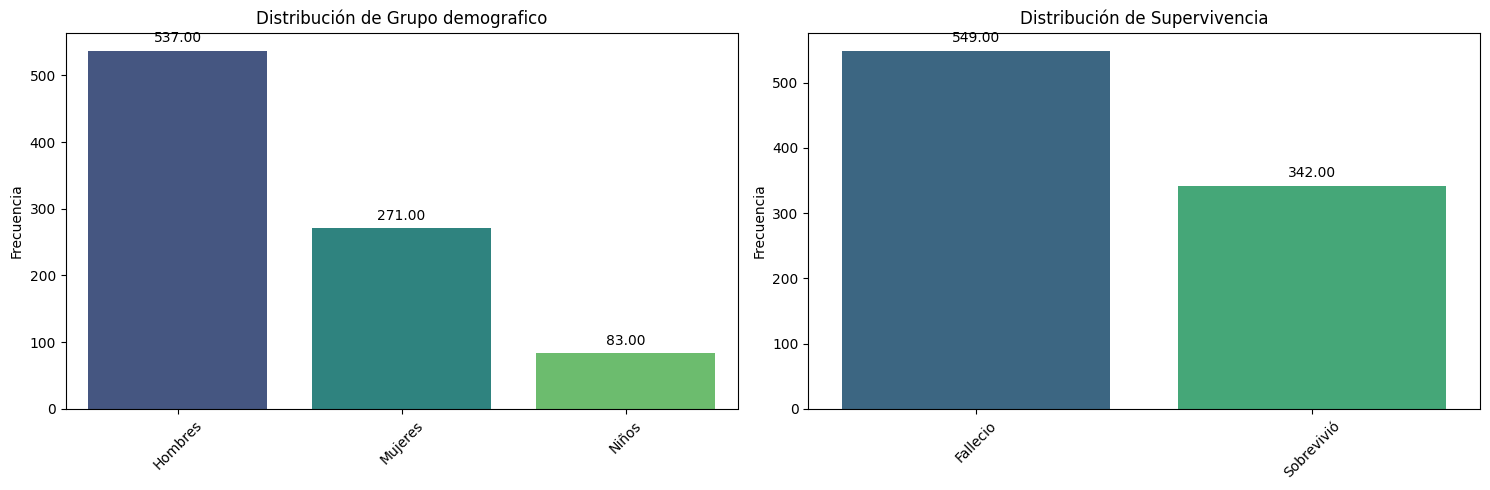

In [16]:
print("Distribucion de los valores absolutos:")
pinta_distribucion_categoricas(df_titanic_copia,["Grupo demografico","Supervivencia"], relativa= False, mostrar_valores= True)

Valores absolutos de la relacion grupo (Hombre, mujer, niño)/supervivencia:


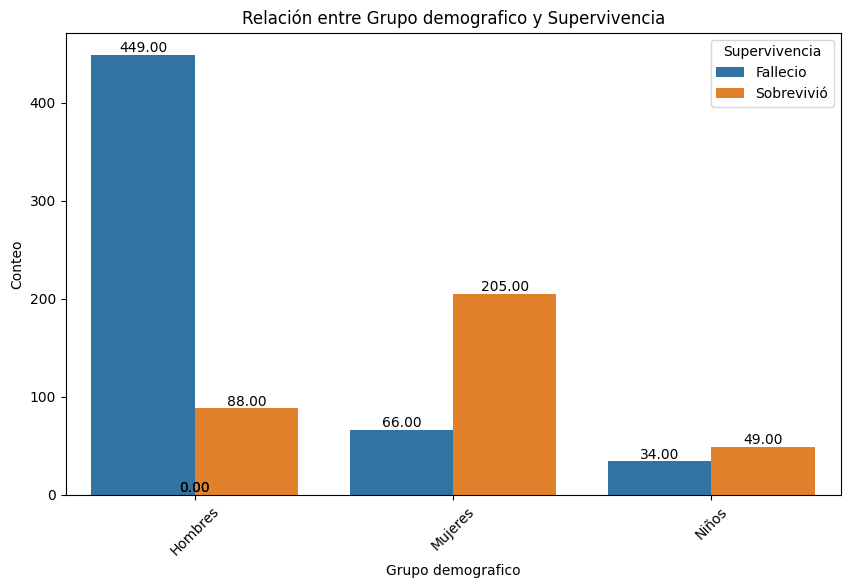

In [17]:
print("Valores absolutos de la relacion grupo (Hombre, mujer, niño)/supervivencia:")
plot_categorical_relationship_fin(df_titanic_copia, "Grupo demografico","Supervivencia", relative_freq = False, show_values = True)

In [18]:
df_titanic_copia.groupby("Grupo demografico", as_index = False)["Supervivencia"].value_counts(normalize = True)

,Grupo demografico,Supervivencia,proportion
0,Hombres,Fallecio,0.836127
1,Hombres,Sobrevivió,0.163873
2,Mujeres,Sobrevivió,0.756458
3,Mujeres,Fallecio,0.243542
4,Niños,Sobrevivió,0.590361
5,Niños,Fallecio,0.409639


Usando 'Supervivencia' como directora:


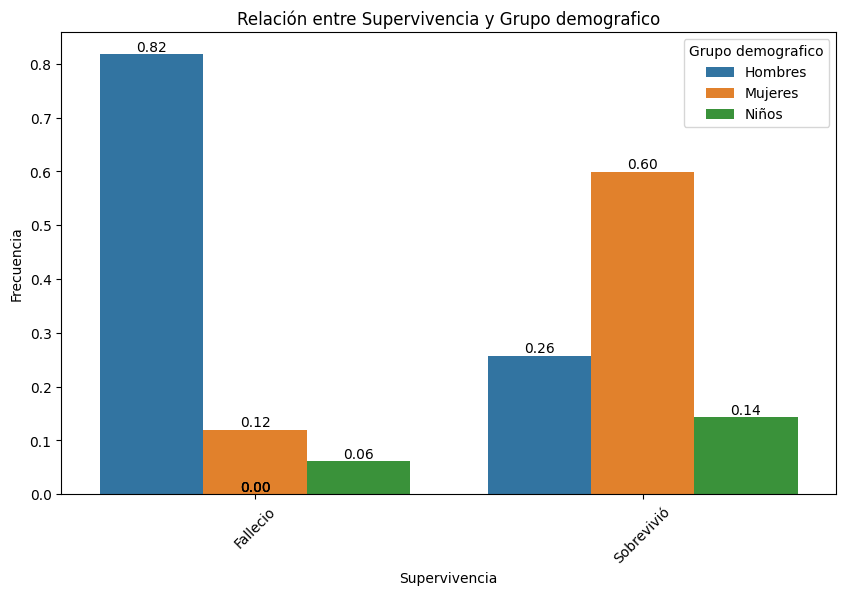

In [19]:
print("Usando 'Supervivencia' como directora:")
plot_categorical_relationship_fin(df_titanic_copia, "Supervivencia","Grupo demografico", relative_freq = True, show_values = True)

### 1.6.2

In [20]:
pasajeros_totales_primera = df_titanic.loc[df_titanic['class'] == 'First'].shape[0]
pasajeros_totales_segunda = df_titanic.loc[df_titanic['class'] == 'Second'].shape[0]
pasajeros_totales_tercera = df_titanic.loc[df_titanic['class'] == 'Third'].shape[0]
pasajeros_totales_clase = pasajeros_totales_primera+ pasajeros_totales_segunda+ pasajeros_totales_tercera
por_primera= round((pasajeros_totales_primera/pasajeros_totales_clase)*100,2)
por_segunda= round((pasajeros_totales_segunda/pasajeros_totales_clase)*100,2)
por_tercera= round((pasajeros_totales_tercera/pasajeros_totales_clase)*100,2)
print(f'Los pasajeros totales según la clase fueron: \n{pasajeros_totales_primera} pasajeros de primera clase lo que supone un {por_primera}% respecto al total de pasajeros') 
print(f'{pasajeros_totales_segunda} pasajeros de segunda clase lo que supone un {por_segunda}% respecto al total de pasajeros') 
print(f'Y {pasajeros_totales_tercera} pasajeros de tercera clase lo que supone un {por_tercera}% respecto al total de pasajeros de tercera clase\nen total fueron {pasajeros_totales_clase} pasajeros.')
print()
sobrevivientes_primera = df_titanic.loc[(df_titanic['class'] == 'First') & (df_titanic['alive'] == 'yes')].shape[0]
sobrevivientes_segunda = df_titanic.loc[(df_titanic['class'] == 'Second') & (df_titanic['alive'] == 'yes')].shape[0]
sobrevivientes_tercera = df_titanic.loc[(df_titanic['class'] == 'Third') & (df_titanic['alive'] == 'yes')].shape[0]
print(f'En terminos absolutos los supervivientes por clases fueron:\n{sobrevivientes_primera} supervivientes de primera clase\n{sobrevivientes_segunda} supervivienets de segunda clase\nY {sobrevivientes_tercera} supervivientes de tercera clase.')
print()
relativos_primera = round((sobrevivientes_primera/pasajeros_totales_primera)*100,3)
relativos_segunda = round((sobrevivientes_segunda/pasajeros_totales_segunda)*100,3)
relativos_tercera = round((sobrevivientes_tercera/pasajeros_totales_tercera)*100,3)
print(f'En terminos relativos los supervivientes por clases fueron:\n{relativos_primera}% pasajeros de primera clase sobrevivió\n{relativos_segunda}% pasajeros de segunda clase sobrevivió\nY {relativos_tercera}% pasajeros de tercera clase sobrevivió.')
print()
print("La tabla de contingencia es:")
tabla_contingencia_clase = pd.crosstab(df_titanic['class'], df_titanic['alive'])
tabla_contingencia_clase

Los pasajeros totales según la clase fueron: 
216 pasajeros de primera clase lo que supone un 24.24% respecto al total de pasajeros
184 pasajeros de segunda clase lo que supone un 20.65% respecto al total de pasajeros
Y 491 pasajeros de tercera clase lo que supone un 55.11% respecto al total de pasajeros de tercera clase
en total fueron 891 pasajeros.

En terminos absolutos los supervivientes por clases fueron:
136 supervivientes de primera clase
87 supervivienets de segunda clase
Y 119 supervivientes de tercera clase.

En terminos relativos los supervivientes por clases fueron:
62.963% pasajeros de primera clase sobrevivió
47.283% pasajeros de segunda clase sobrevivió
Y 24.236% pasajeros de tercera clase sobrevivió.

La tabla de contingencia es:


alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [21]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_clase)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


El valor de p es muy pequeño, por lo que estan muy relaciondas, aunque algo menos que el sexo.

### 1.6.2 GRAFICAMENTE

Distribucion de los valores relativos:


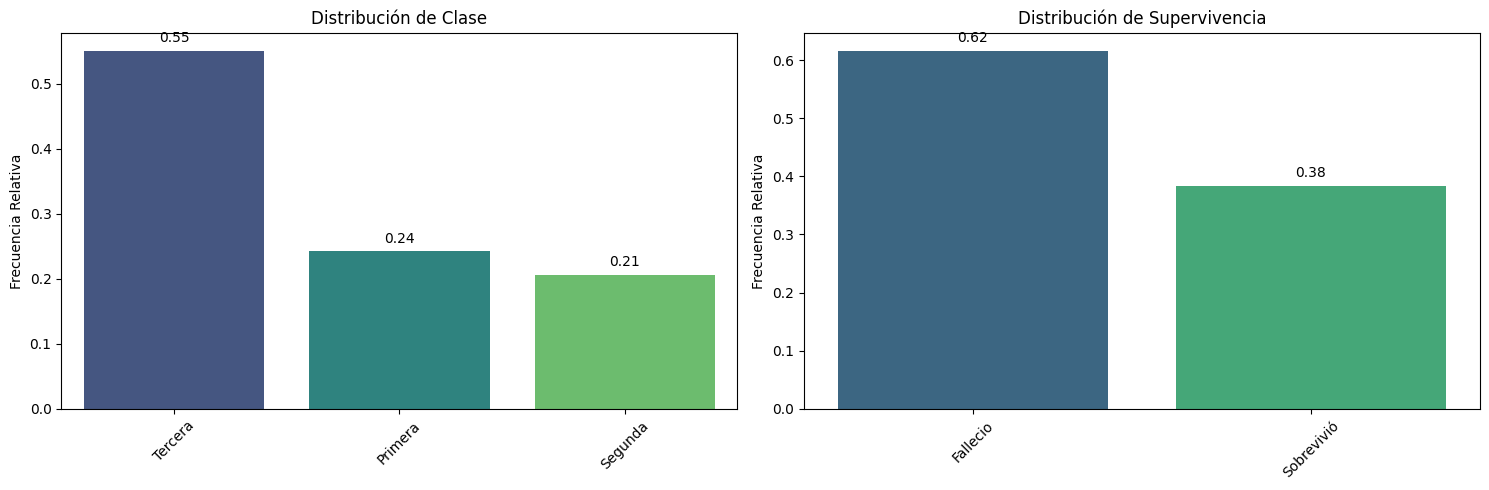

In [22]:
print("Distribucion de los valores relativos:")
pinta_distribucion_categoricas(df_titanic_copia,["Clase","Supervivencia"], relativa= True, mostrar_valores= True)

Valores relativos de la relacion clase/supervivencia:


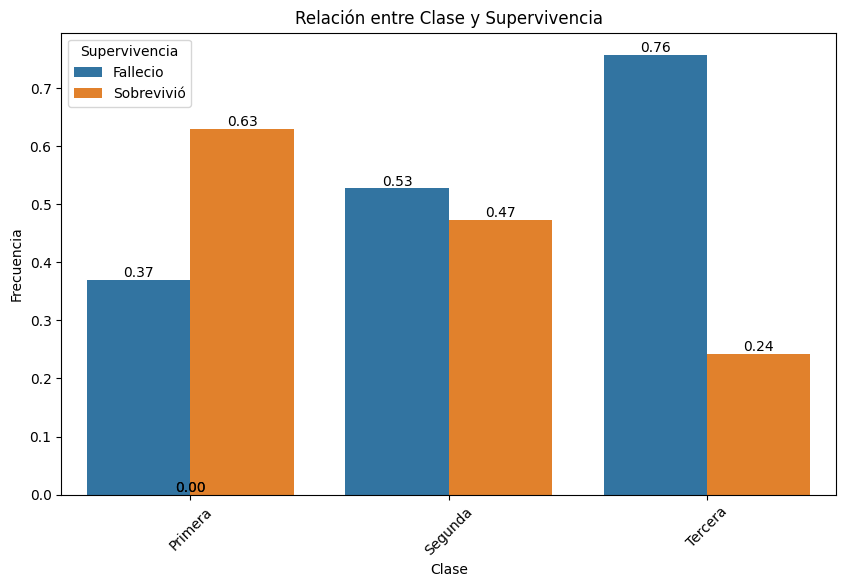

In [23]:
print("Valores relativos de la relacion clase/supervivencia:")
plot_categorical_relationship_fin(df_titanic_copia, "Clase","Supervivencia", relative_freq = True, show_values = True)



Distribucion de los valores absolutos:


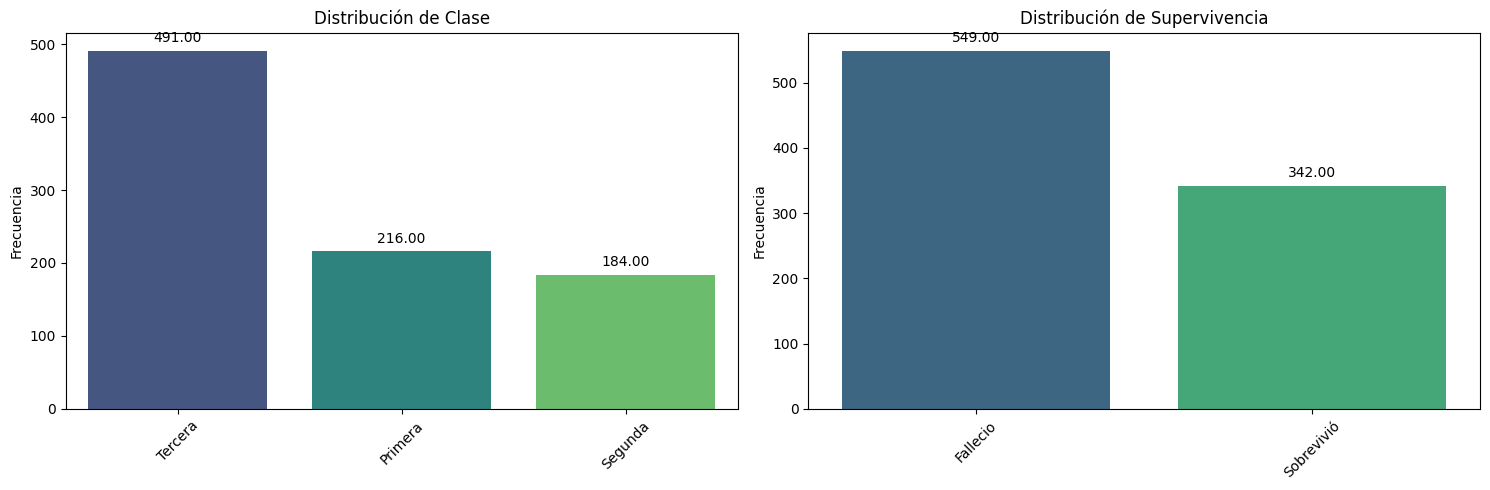

In [24]:
print("Distribucion de los valores absolutos:")
pinta_distribucion_categoricas(df_titanic_copia,["Clase","Supervivencia"], relativa= False, mostrar_valores= True)

Valores absolutos de la relacion clase/supervivencia::


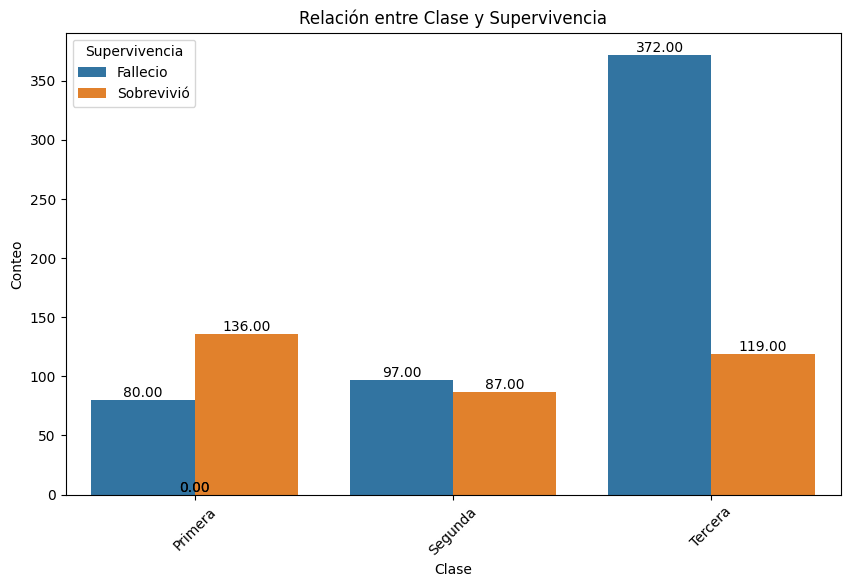

In [25]:
print("Valores absolutos de la relacion clase/supervivencia::")
plot_categorical_relationship_fin(df_titanic_copia, "Clase","Supervivencia", relative_freq = False, show_values = True)

In [26]:
df_titanic_copia.groupby("Clase", as_index = False)["Supervivencia"].value_counts(normalize = True)

,Clase,Supervivencia,proportion
0,Primera,Sobrevivió,0.629630
1,Primera,Fallecio,0.370370
2,Segunda,Fallecio,0.527174
3,Segunda,Sobrevivió,0.472826
4,Tercera,Fallecio,0.757637
5,Tercera,Sobrevivió,0.242363


Usando 'Supervivencia' como directora:


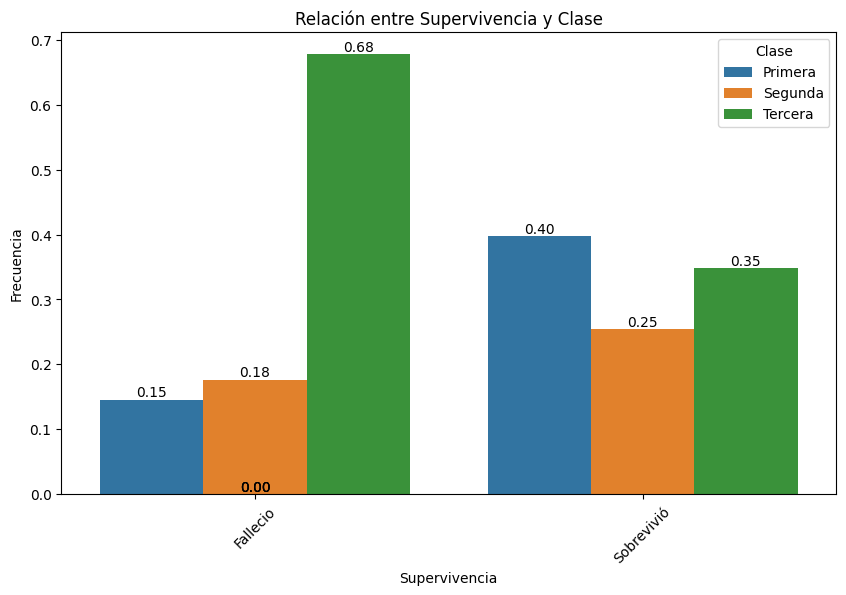

In [27]:
print("Usando 'Supervivencia' como directora:")
plot_categorical_relationship_fin(df_titanic_copia, "Supervivencia","Clase", relative_freq = True, show_values = True)


### 1.6.3

In [28]:

pasajeros_totales_de_Cherbourg = df_titanic.loc[df_titanic['embark_town'] == 'Cherbourg'].shape[0]
pasajeros_totales_de_Queenstown	 = df_titanic.loc[df_titanic['embark_town'] == 'Queenstown'].shape[0]
pasajeros_totales_de_Southampton = df_titanic.loc[df_titanic['embark_town'] == 'Southampton'].shape[0]
print(f'Los pasajeros que se montaron en cada ciudad fueron:\n{pasajeros_totales_de_Cherbourg} en Cherbourg\n{pasajeros_totales_de_Queenstown} en Queenstown\n{pasajeros_totales_de_Southampton} en Southampton  ')
print(f'En total se montaron: {pasajeros_totales_de_Cherbourg+pasajeros_totales_de_Queenstown+pasajeros_totales_de_Southampton} pasajeros.') #lo hago para comprobar que coincide con el valor del ejercio anterior
print()
sobrevivientes_Cherbourg = df_titanic.loc[(df_titanic['embark_town'] == 'Cherbourg') & (df_titanic['alive'] == 'yes')].shape[0]
sobrevivientes_Queenstown = df_titanic.loc[(df_titanic['embark_town'] == 'Queenstown') & (df_titanic['alive'] == 'yes')].shape[0]
sobrevivientes_Southampton = df_titanic.loc[(df_titanic['embark_town'] == 'Southampton') & (df_titanic['alive'] == 'yes')].shape[0]
print(f'En terminos absolutos los supervivientes por ciudad de embarque fueron:\n{sobrevivientes_Cherbourg} personas que embarcaron en Cherbourg sobrevivió\n{sobrevivientes_Queenstown} personas que embarcaron en Queenstown sobrevivió\nY unas {sobrevivientes_Southampton} personas de las que embarcaron en de Southampton sobrevivieron.')
print()
sobrevivientes_relativos_Cherbourg = round((sobrevivientes_Cherbourg/pasajeros_totales_de_Cherbourg)*100,3)
sobrevivientes_relativos_Queenstown = round((sobrevivientes_Queenstown/pasajeros_totales_de_Queenstown)*100,3)
sobrevivientes_relativos_Southampton = round((sobrevivientes_Southampton/pasajeros_totales_de_Southampton)*100,3)
print()
print(f'En terminos relativos los supervivientes por ciudad de embarque fueron:\nEl {sobrevivientes_relativos_Cherbourg}% de los que embarcaron en Cherbourg\nEl {sobrevivientes_relativos_Queenstown}% de los que embarcaron en Queenstown\nY el {sobrevivientes_relativos_Southampton}% de los que embarcaron en Southampton')
print()
print(f'Si comparamos los supervivientes que embarcaron en cada ciudad, respecto al total de pasajeros, vemos que:')
print(f"un {round((sobrevivientes_Cherbourg/891)*100,3)}% de los supervivientes embarcó en Cherbourg")
print(f"un {round((sobrevivientes_Queenstown/891)*100,3)}% de los supervivientes embarcó en Queenstown")
print(f"un {round((sobrevivientes_Southampton/891)*100,3)}% de los supervivientes embarcó en Southampton")
print()
print("La tabla de contingencia es:")
tabla_contingencia_ciudad = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
tabla_contingencia_ciudad

Los pasajeros que se montaron en cada ciudad fueron:
168 en Cherbourg
77 en Queenstown
646 en Southampton  
En total se montaron: 891 pasajeros.

En terminos absolutos los supervivientes por ciudad de embarque fueron:
93 personas que embarcaron en Cherbourg sobrevivió
30 personas que embarcaron en Queenstown sobrevivió
Y unas 219 personas de las que embarcaron en de Southampton sobrevivieron.


En terminos relativos los supervivientes por ciudad de embarque fueron:
El 55.357% de los que embarcaron en Cherbourg
El 38.961% de los que embarcaron en Queenstown
Y el 33.901% de los que embarcaron en Southampton

Si comparamos los supervivientes que embarcaron en cada ciudad, respecto al total de pasajeros, vemos que:
un 10.438% de los supervivientes embarcó en Cherbourg
un 3.367% de los supervivientes embarcó en Queenstown
un 24.579% de los supervivientes embarcó en Southampton

La tabla de contingencia es:


alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [29]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_ciudad)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


En este caso también las variables categóricas ciudad de embarque y fallecimiento están relacionadas entre sí. Aunque el valor de chi-cuadrado (25.964452881874784) es menor que en los casos anteriores, el valor p sigue siendo muy pequeño (2.3008626481449577e-06), lo que indica una asociación significativa entre las variables categóricas. Por lo tanto, podemos concluir que las variables están relacionadas entre sí, aunque la fuerza de esa relación puede ser menor en comparación con los casos anteriores.
Sospecho que está mas relacionado con la cantiad de cada clase que se subío en cada ciudad que de la ciudad en si.

### 1.6.3 GRAFICAMENTE

Distribucion de los valores relativos:


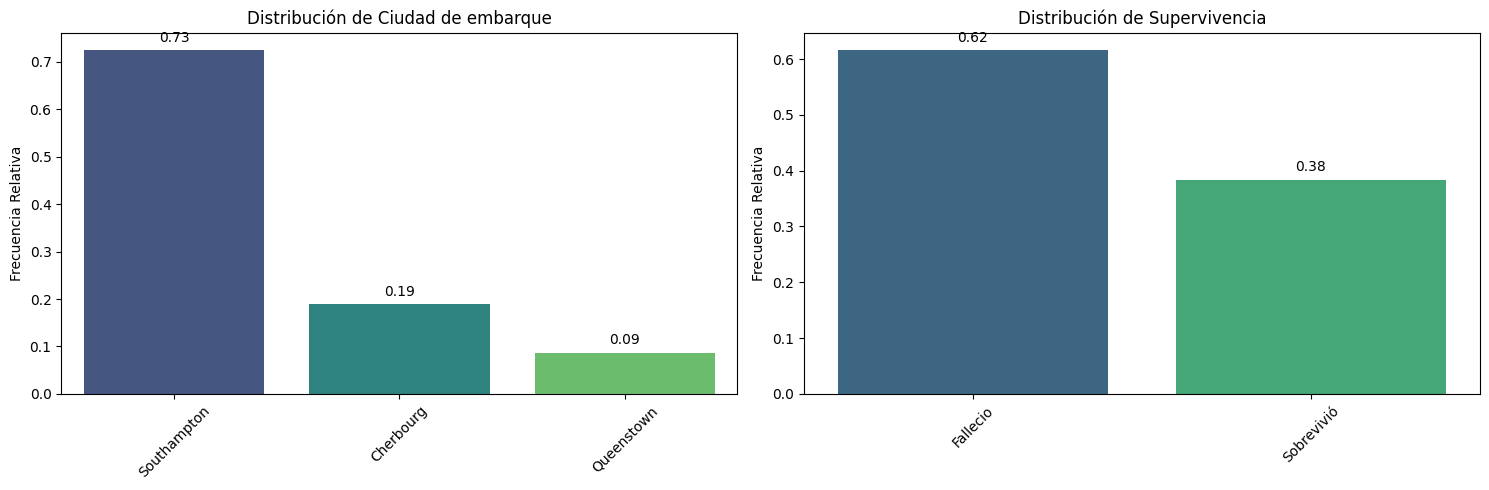

In [30]:
print("Distribucion de los valores relativos:")
pinta_distribucion_categoricas(df_titanic_copia,["Ciudad de embarque","Supervivencia"], relativa= True, mostrar_valores= True)

Valores relativos de la relacion Ciudad de embarque/supervivencia:


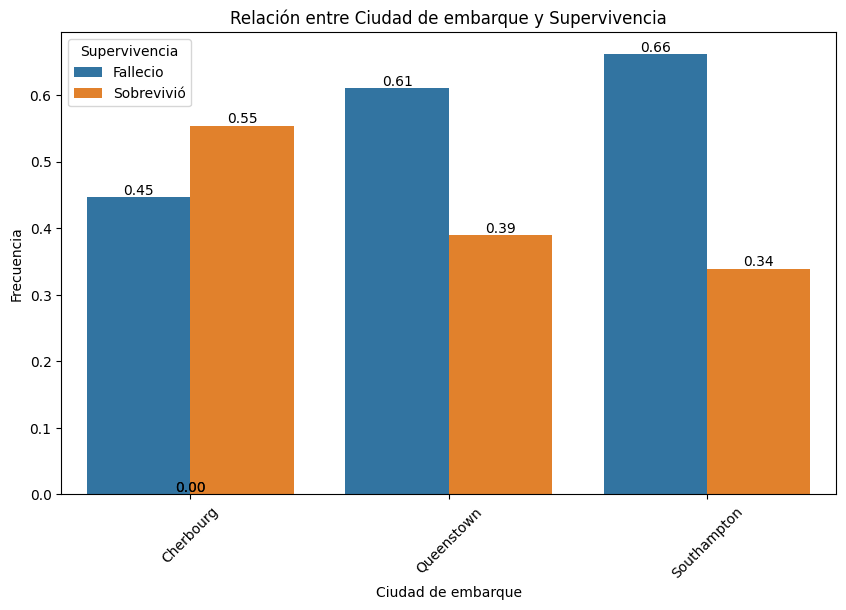

In [31]:
print("Valores relativos de la relacion Ciudad de embarque/supervivencia:")
plot_categorical_relationship_fin(df_titanic_copia, "Ciudad de embarque","Supervivencia", relative_freq = True, show_values = True)

Distribucion de los valores relativos:


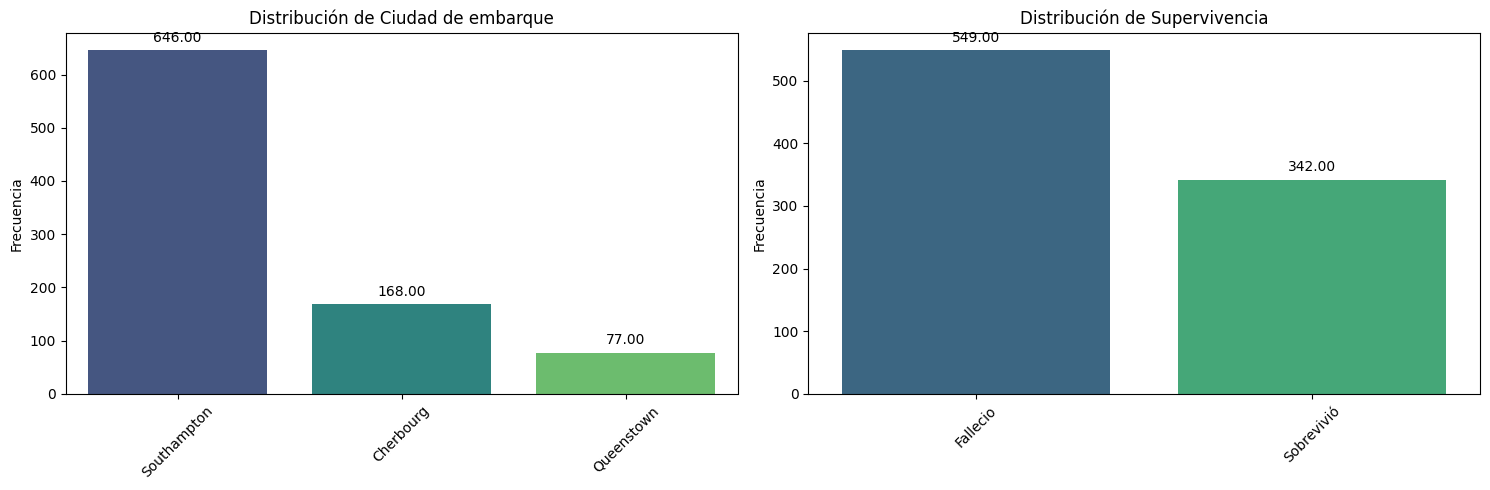

In [32]:
print("Distribucion de los valores relativos:")
pinta_distribucion_categoricas(df_titanic_copia,["Ciudad de embarque","Supervivencia"], relativa= False, mostrar_valores= True)

Valores absolutos de la relacion Ciudad de embarque/supervivencia:


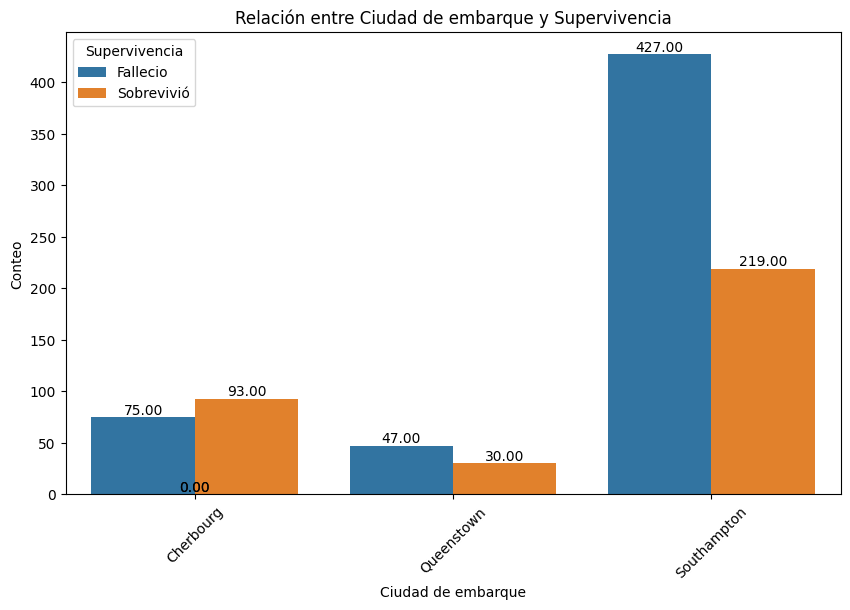

In [33]:
print("Valores absolutos de la relacion Ciudad de embarque/supervivencia:")
plot_categorical_relationship_fin(df_titanic_copia, "Ciudad de embarque","Supervivencia", relative_freq = False, show_values = True)

In [34]:
df_titanic_copia.groupby("Ciudad de embarque", as_index = False)["Supervivencia"].value_counts(normalize = True)

,Ciudad de embarque,Supervivencia,proportion
0,Cherbourg,Sobrevivió,0.553571
1,Cherbourg,Fallecio,0.446429
2,Queenstown,Fallecio,0.610390
3,Queenstown,Sobrevivió,0.389610
4,Southampton,Fallecio,0.660991
5,Southampton,Sobrevivió,0.339009


Usando 'Supervivencia' como directora:


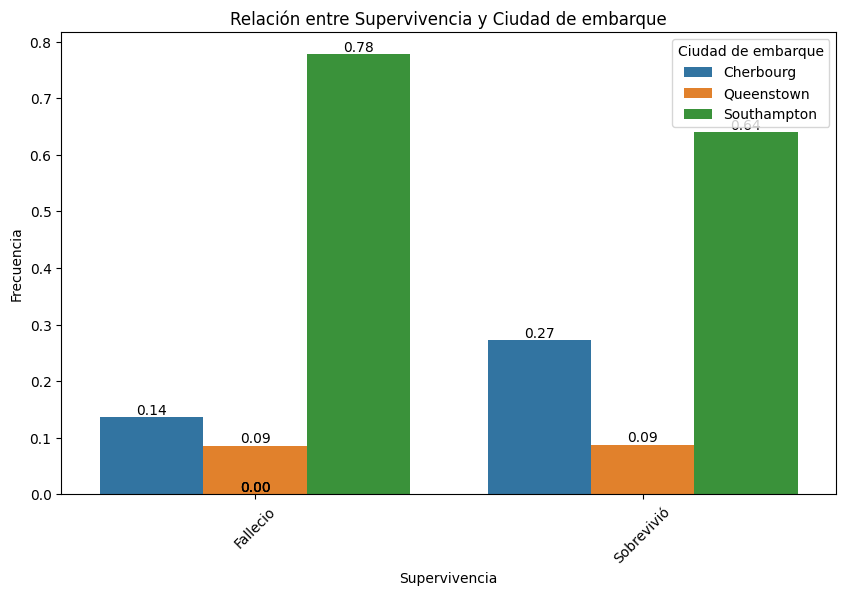

In [35]:
print("Usando 'Supervivencia' como directora:")
plot_categorical_relationship_fin(df_titanic_copia, "Supervivencia","Ciudad de embarque", relative_freq = True, show_values = True)

### 1.6.4

In [36]:
media = round(df_titanic_copia["Precio del pasaje"].mean(), 3)
minimo = round(df_titanic_copia["Precio del pasaje"].min(), 3)
maxi = round(df_titanic_copia["Precio del pasaje"].max(), 3)
mediana = round(df_titanic_copia["Precio del pasaje"].median(), 3)
desviacion_tipica = round(df_titanic_copia["Precio del pasaje"].std(), 3)
print(f"El precio medio del pasaje fue {media}, la mediana fue {mediana} siendo la desviacion tipica {desviacion_tipica},\nesta diferencia entre media y mediana se puede deber a los valores maximos y minimos, {maxi} y {minimo}")



El precio medio del pasaje fue 32.204, la mediana fue 14.454 siendo la desviacion tipica 49.693,
esta diferencia entre media y mediana se puede deber a los valores maximos y minimos, 512.329 y 0.0


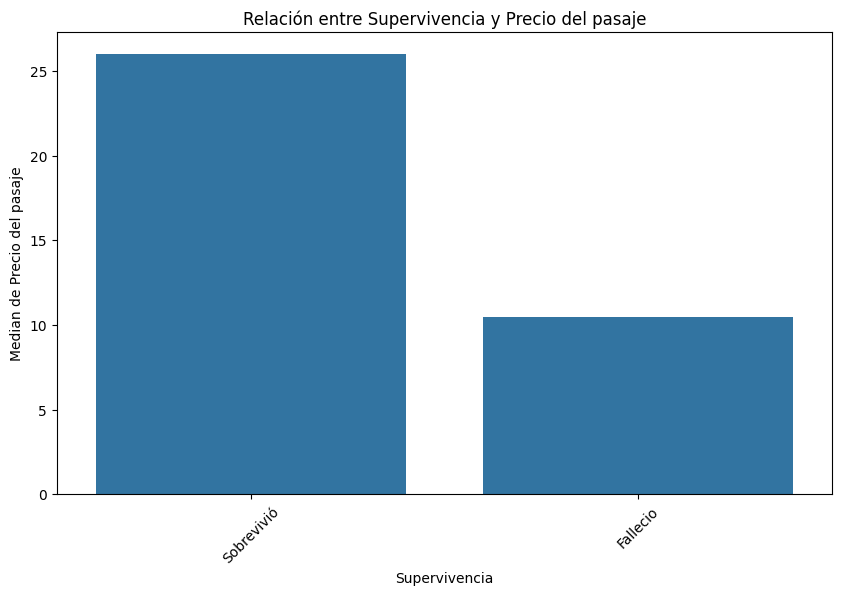

In [37]:
plot_categorical_numerical_relationship(df_titanic_copia,"Supervivencia","Precio del pasaje", measure = "median")

(2,)


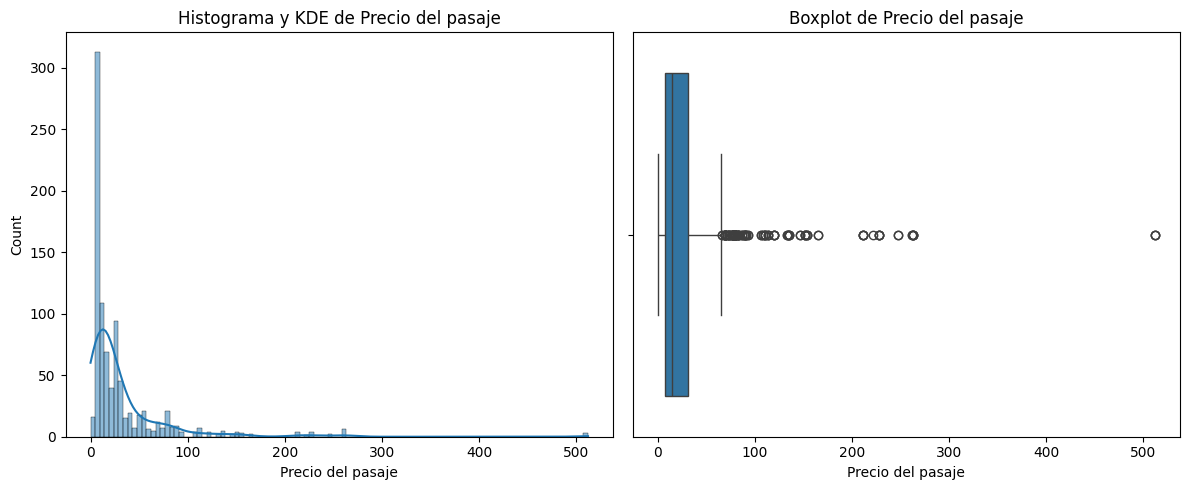

In [38]:
plot_combined_graphs(df_titanic_copia,["Precio del pasaje"])

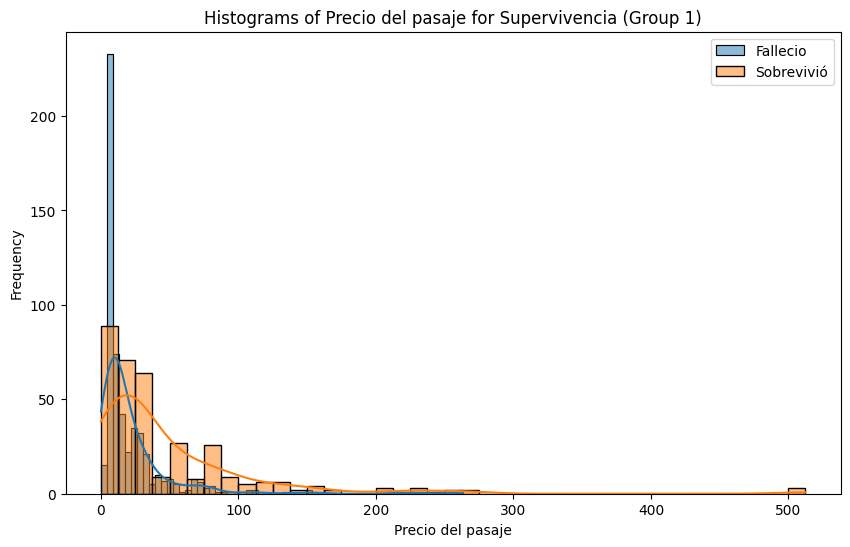

In [39]:
plot_grouped_histograms(df_titanic_copia, cat_col="Supervivencia",num_col="Precio del pasaje", group_size= 2)

In [40]:
from scipy.stats import mannwhitneyu
grupo_a = df_titanic_copia.loc[df_titanic_copia.Supervivencia == "Sobrevivió"]["Precio del pasaje"]
grupo_b = df_titanic_copia.loc[df_titanic_copia.Supervivencia == "Fallecio"]["Precio del pasaje"]
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


El valor de P es menor que 0.05, entonces si estan relacionadas.

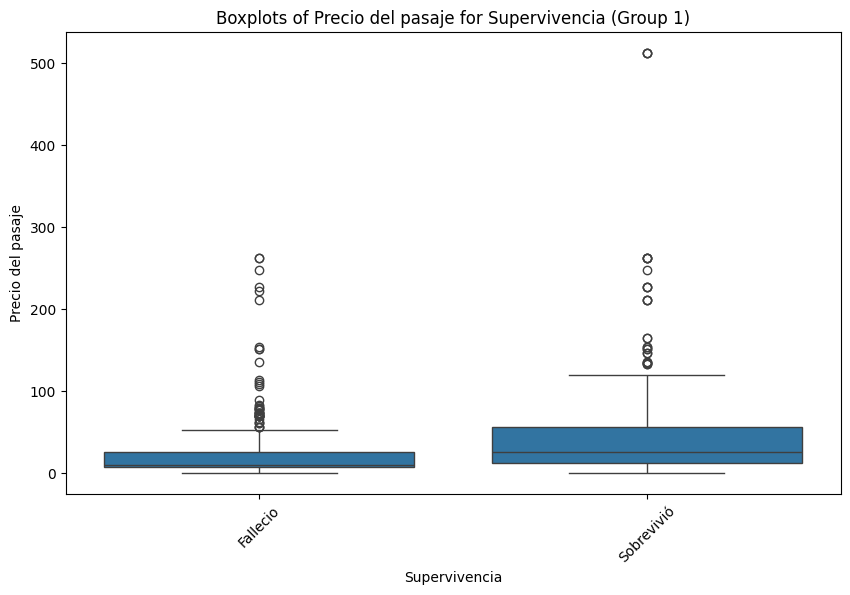

In [41]:
plot_grouped_boxplots(df_titanic_copia,"Supervivencia","Precio del pasaje")

### 1.6.5

In [42]:
billete_barato = df_titanic["fare"].min()
conteo_cero_fare = (df_titanic['fare'] == 0.0).sum()
print(f'El precio "{billete_barato}" existe en la tabla, de hecho aparece {conteo_cero_fare} veces.')
print("El motivo de esto es difícil de saber, cualquier conclusión es mera suposición.")

billete_caro = df_titanic["fare"].max()
conteo = df_titanic['fare'].value_counts()[billete_caro]
print("El billete más caro costó:", billete_caro, "y se vendieron", conteo, "billetes así.")

pasajeros_billete_mas_caro = df_titanic[df_titanic['fare'] == billete_caro]
estados_ricos = pasajeros_billete_mas_caro['alive'].values
print(f'¿Sobrevivieron las personas que pagaron el billete más caro? {estados_ricos}.')





El precio "0.0" existe en la tabla, de hecho aparece 15 veces.
El motivo de esto es difícil de saber, cualquier conclusión es mera suposición.
El billete más caro costó: 512.3292 y se vendieron 3 billetes así.
¿Sobrevivieron las personas que pagaron el billete más caro? ['yes' 'yes' 'yes'].


### 1.6.6

### 1.6.7

In [43]:
media_e = round(df_titanic_copia["Edad"].mean(), 3)
minimo_e = round(df_titanic_copia["Edad"].min(), 3)
maxi_e = round(df_titanic_copia["Edad"].max(), 3)
mediana_e = round(df_titanic_copia["Edad"].median(), 3)
desviacion_tipica_e = round(df_titanic_copia["Edad"].std(), 3)
print()
print(f"La edad media del pasaje fue {media_e}, la mediana fue {mediana_e} siendo la desviacion tipica {desviacion_tipica_e},\nesta diferencia entre media y mediana se puede deber a los valores maximos y minimos, {maxi_e} y {minimo_e}")


La edad media del pasaje fue 30.323, la mediana fue 32.0 siendo la desviacion tipica 13.065,
esta diferencia entre media y mediana se puede deber a los valores maximos y minimos, 80.0 y 0.42


In [44]:
estadisticas_sobrevivientes = df_titanic_copia[df_titanic_copia['Supervivencia'] == 'Sobrevivió']['Edad'].describe()
estadisticas_fallecidos = df_titanic_copia[df_titanic_copia['Supervivencia'] == 'Fallecio']['Edad'].describe()
print("Estadísticas de los sobrevivientes:")
print("La edad media es:", round(estadisticas_sobrevivientes['mean'], 3))
print("La mediana de la edad es:", round(estadisticas_sobrevivientes['50%'], 3))
print("La desviación estándar es:", round(estadisticas_sobrevivientes['std'], 3))
print()
print("Estadísticas de los fallecidos:")
print("La edad media es:", round(estadisticas_fallecidos['mean'], 3))
print("La mediana de la edad es:", round(estadisticas_fallecidos['50%'], 3))
print("La desviación estándar es:", round(estadisticas_fallecidos['std'], 3))

Estadísticas de los sobrevivientes:
La edad media es: 28.956
La mediana de la edad es: 31.0
La desviación estándar es: 13.841

Estadísticas de los fallecidos:
La edad media es: 31.175
La mediana de la edad es: 32.0
La desviación estándar es: 12.494


Vemos que apenas hay diferencia en cuanto a las edades entre los supervivientes y los ffallecidos, por lo que a priori sospecho decir que no relacion, aunque hay que comprobarlo.

<Axes: xlabel='Clase', ylabel='Edad'>

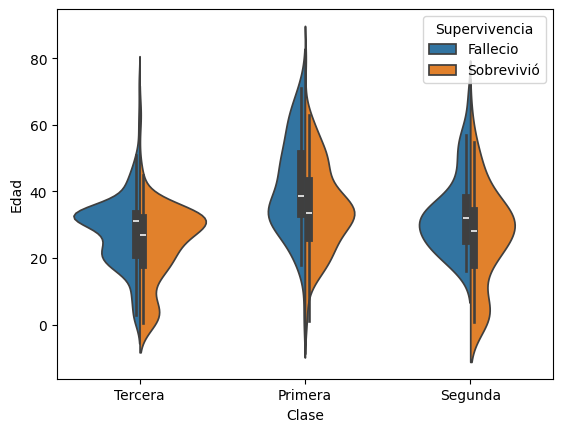

In [45]:
sns.violinplot(x=df_titanic_copia["Clase"], y=df_titanic_copia["Edad"], hue=df_titanic_copia["Supervivencia"], split=True)

Esto lo he visto en la pagina que aconsejaba los repositorios, "https://www.data-to-viz.com/#boxplot"

Si biene s cierto que las clases no son "del todo asimetricas" la simetria tampoco es fuerte, por lo que ahora si hay sospechas de que guarden relacion.

<Axes: xlabel='Clase', ylabel='Edad'>

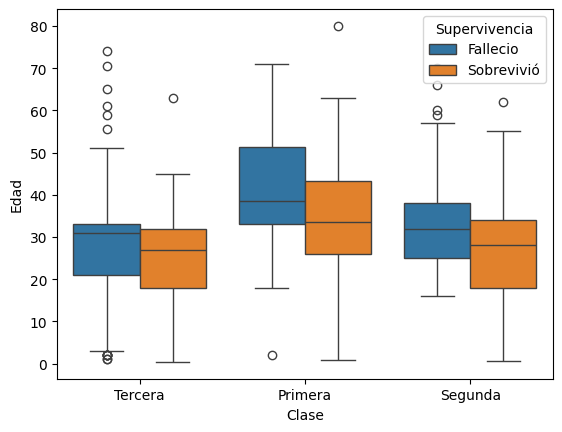

In [46]:
sns.boxplot(x=df_titanic_copia["Clase"], y=df_titanic_copia["Edad"], hue=df_titanic_copia["Supervivencia"])

In [47]:
tabla_contingencia_edad_clase = pd.crosstab(index=df_titanic_copia["Clase"], columns=df_titanic_copia["Supervivencia"])
tabla_contingencia_edad_clase['Edad media supervivientes'] = round((df_titanic_copia[df_titanic_copia['Supervivencia'] == 'Sobrevivió'].groupby('Clase')['Edad'].mean()),3)
tabla_contingencia_edad_clase['Edad mediana supervivientes'] = round((df_titanic_copia[df_titanic_copia['Supervivencia'] == 'Sobrevivió'].groupby('Clase')['Edad'].median()),3)
tabla_contingencia_edad_clase['Edad media fallecidos'] = round((df_titanic_copia[df_titanic_copia['Supervivencia'] == 'Fallecio'].groupby('Clase')['Edad'].mean()),3)
tabla_contingencia_edad_clase['Edad mediana fallecidos'] = round((df_titanic_copia[df_titanic_copia['Supervivencia'] == 'Fallecio'].groupby('Clase')['Edad'].median()),3)
tabla_contingencia_edad_clase

Supervivencia,Fallecio,Sobrevivió,Edad media supervivientes,Edad mediana supervivientes,Edad media fallecidos,Edad mediana fallecidos
Clase,,,,,,
Primera,80,136,35.066,33.6,41.596,38.5
Segunda,97,87,26.210,28.0,33.520,32.0
Tercera,372,119,23.981,27.0,28.323,31.0


In [48]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_edad_clase)

# Imprimir los resultados
print("Valor Chi-Cuadrado:", chi2)
print()
print("P-Value:", p)
print()
print("Grados de Libertad:", dof)
print()
print("Tabla de Frecuencias Esperadas:")
print( expected)


Valor Chi-Cuadrado: 172.85587214904402

P-Value: 7.104932846128002e-32

Grados de Libertad: 10

Tabla de Frecuencias Esperadas:
[[157.70591339  98.24302801  24.49095275  25.45126398  29.71391981
   29.15692206]
 [131.31855038  81.8049986   20.39312505  21.19275695  24.74218494
   24.27838409]
 [259.97553623 161.95197339  40.37292221  41.95597907  48.98289525
   48.06469386]]


Pese a lo que sospeché en un principio, la relación clase/edad con el hecho de salir vivo o no están bastante relacionadas.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [49]:
df_junio = pd.read_csv("./data/dataset_viajes_jun23.csv")




In [50]:
Vuelos = df_junio['aircompany'].value_counts()
Vuelos

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

In [51]:
cardinalidad_junio = cardinalidad(df_junio,10,30)
cardinalidad_junio

,Cardinalidad,%_Cardinalidad,Tipo,Clasificada_como
aircompany,5,0.833333,object,Categorica
origen,11,1.833333,object,Numerica Discreta
destino,11,1.833333,object,Numerica Discreta
distancia,45,7.5,int64,Numerica Discreta
avion,4,0.666667,object,Categorica
con_escala,2,0.333333,bool,Binaria
consumo_kg,501,83.5,float64,Numerica Continua
duracion,113,18.833333,int64,Numerica Discreta
ingresos,600,100.0,float64,Numerica Continua
id_vuelo,347,57.833333,object,Numerica Continua


Valores absolutos:


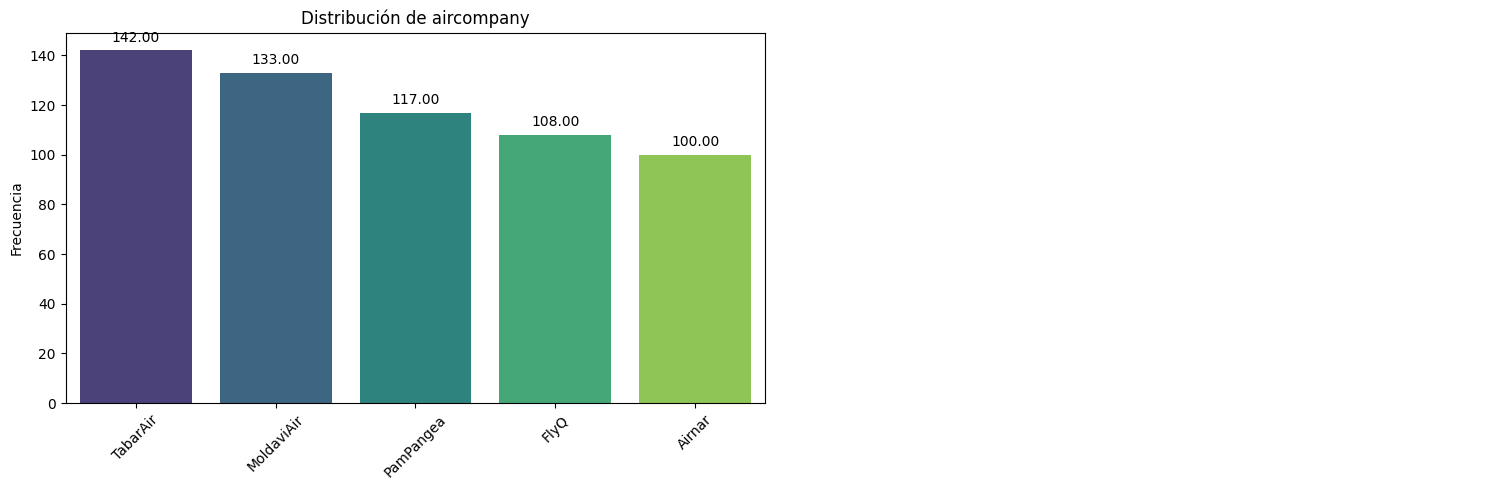

In [52]:
print("Valores absolutos:")
pinta_distribucion_categoricas(df_junio,["aircompany"], relativa= False, mostrar_valores= True)

Valores relativos:


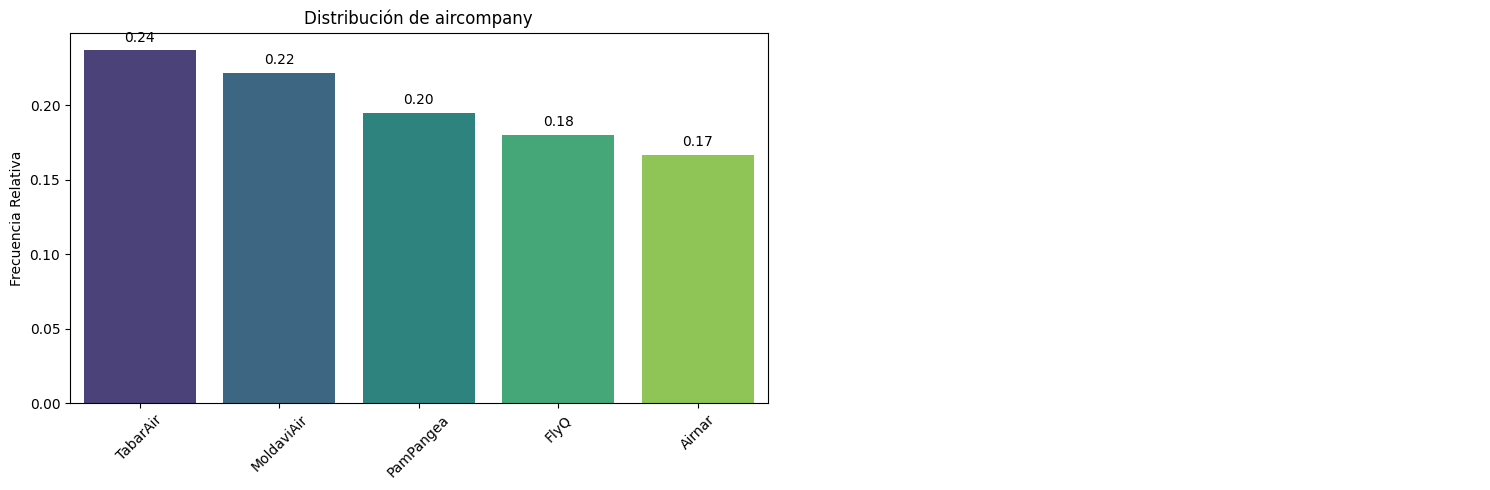

In [53]:
print("Valores relativos:")
pinta_distribucion_categoricas(df_junio,["aircompany"], relativa= True, mostrar_valores= True)


(2,)


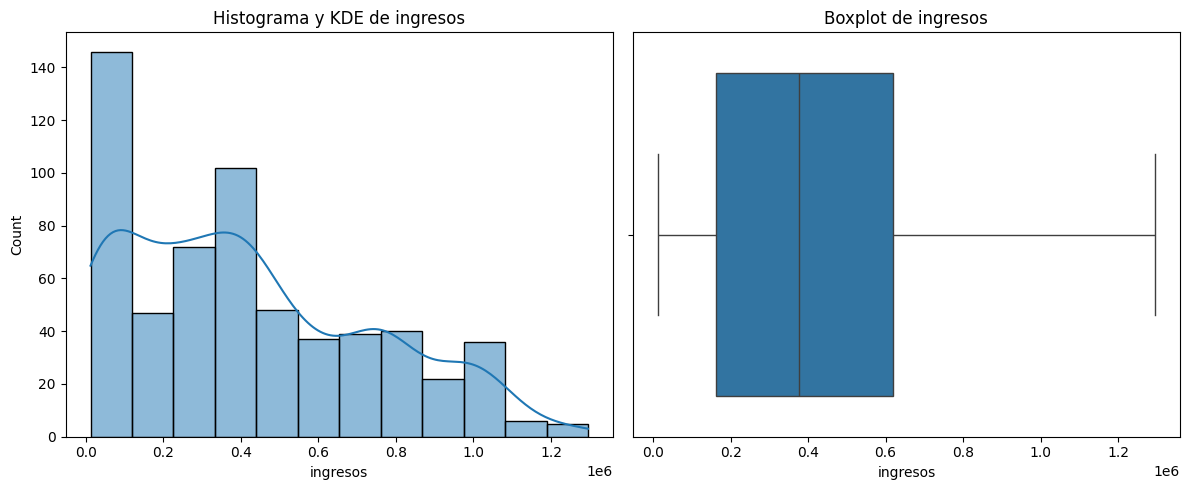

In [54]:
plot_combined_graphs(df_junio,["ingresos"])

Usando la mediana:


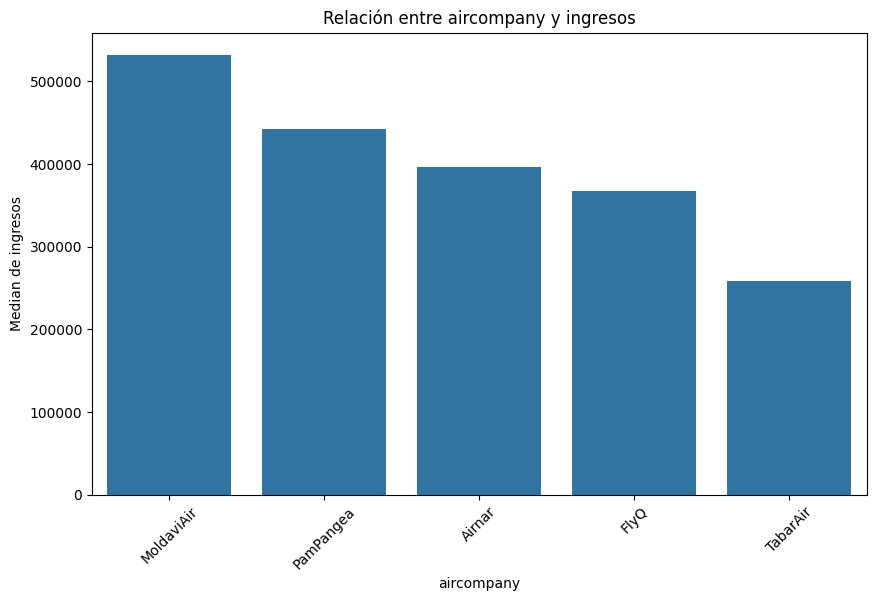

In [55]:
print("Usando la mediana:")
plot_categorical_numerical_relationship(df_junio, "aircompany","ingresos",measure="median")

Usando la media:


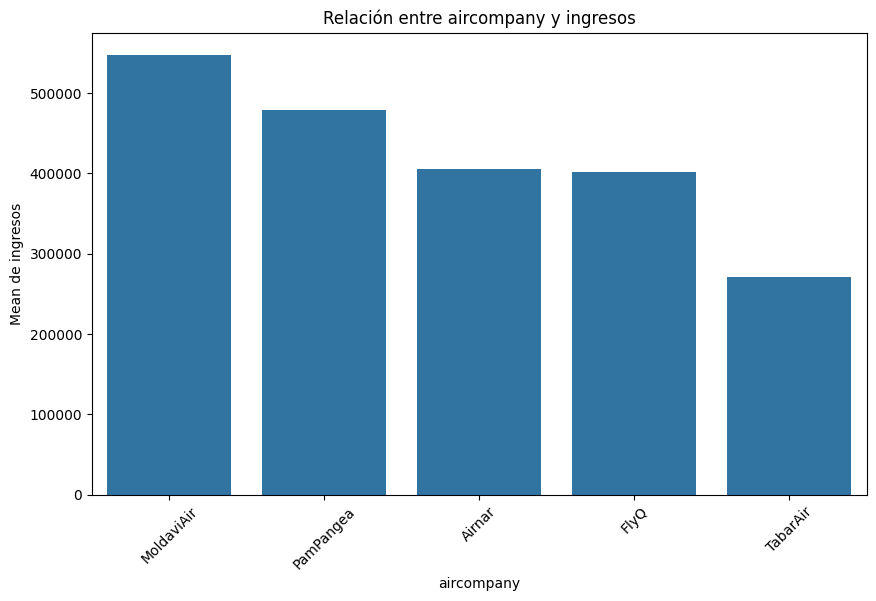

In [56]:
print("Usando la media:")
plot_categorical_numerical_relationship(df_junio, "aircompany","ingresos",measure="mean")

Vemos que pese a ser los que más volamos somos los que menos ingresamos

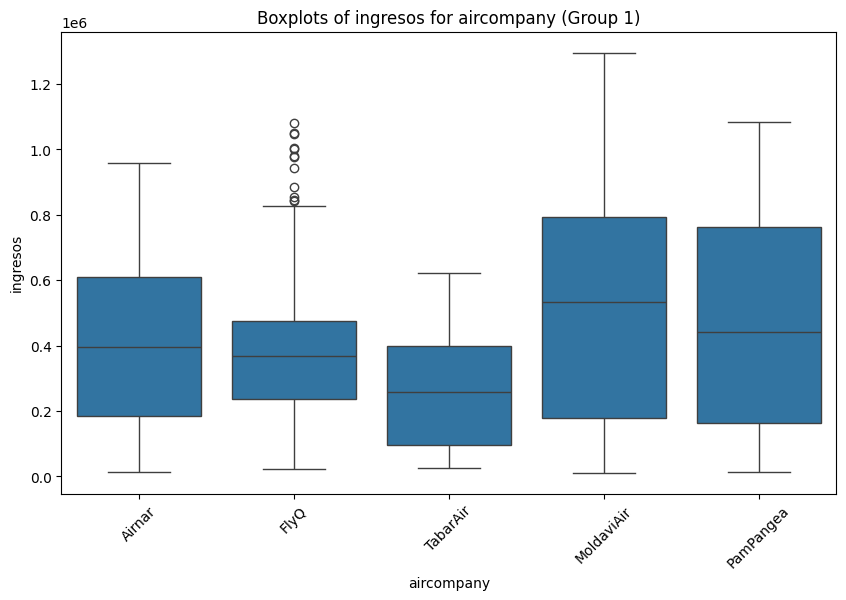

In [57]:
plot_grouped_boxplots(df_junio,"aircompany","ingresos")

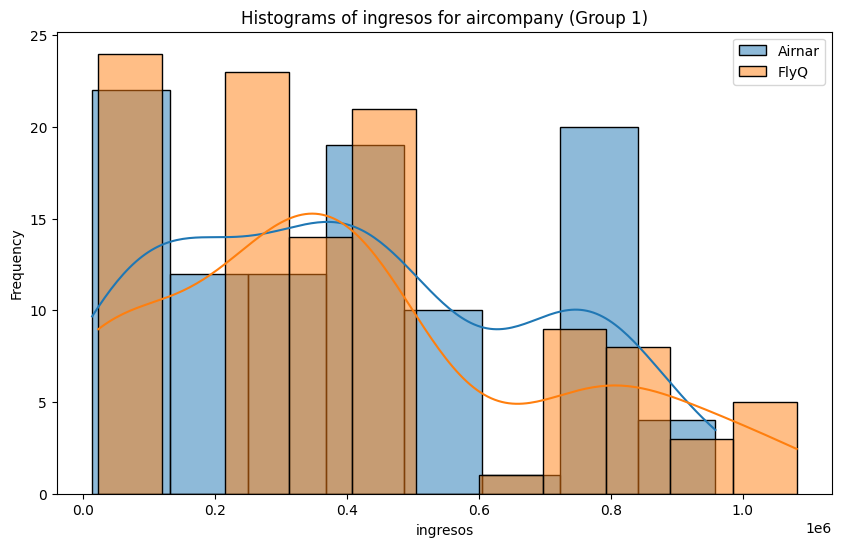

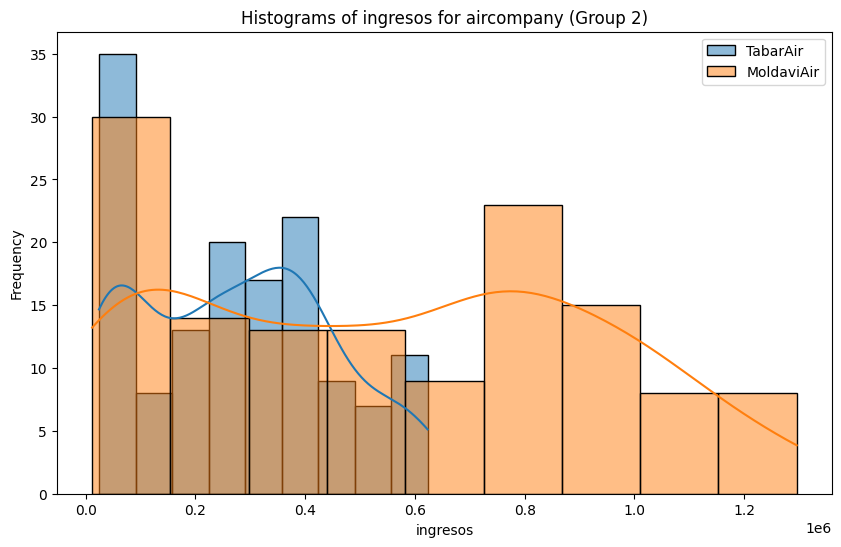

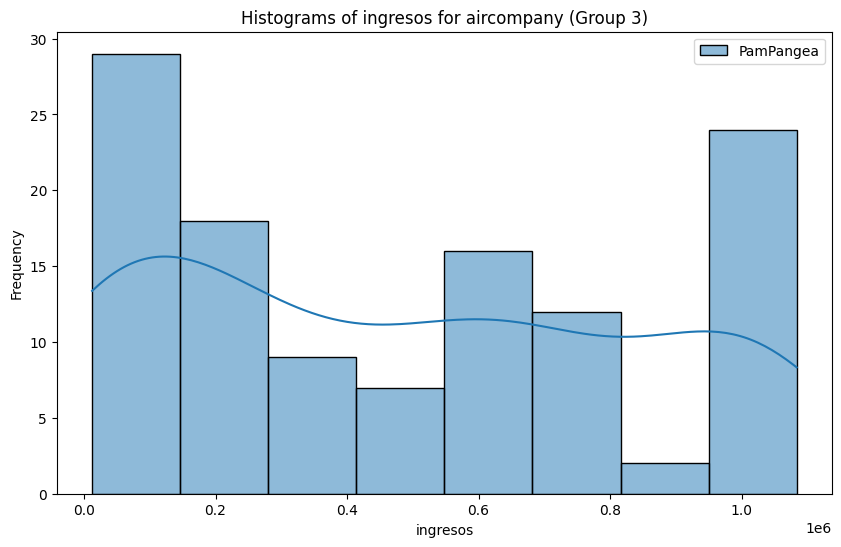

In [58]:
plot_grouped_histograms(df_junio,"aircompany", "ingresos", 2)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [59]:
medida_rangos_categorias = round(((df_junio["distancia"].max())-(df_junio["distancia"].min()))/3,3)
print(f'La diferencia entre rangos será {medida_rangos_categorias}')

corta = df_junio["distancia"].min() + medida_rangos_categorias
medios = corta + medida_rangos_categorias
largad = medios + medida_rangos_categorias
puntos_de_corte = [0, corta, medios, largad, df_junio["distancia"].max()]
puntos_de_corte.sort()
df_junio['cat_vuelo'] = pd.cut(df_junio['distancia'], bins=puntos_de_corte, labels=['Corta distancia', 'Media distancia', 'Larga distancia', 'E. Larga distancia'])


df_junio[['distancia', 'cat_vuelo']].head(15)

La diferencia entre rangos será 6561.667


,distancia,cat_vuelo
0,411,Corta distancia
1,12738,Media distancia
2,9103,Media distancia
3,6370,Corta distancia
4,7480,Media distancia
5,20029,Larga distancia
6,344,Corta distancia
7,16925,Larga distancia
8,16589,Larga distancia
9,1725,Corta distancia


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.